In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# SoftMax Regression

In [3]:
plot_colors = "ryb"
plot_step = 0.02

def decision_boundary (X,y,model,iris, two=None):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z,cmap=plt.cm.RdYlBu)
    
    if two:
        cs = plt.contourf(xx, yy, Z,cmap=plt.cm.RdYlBu)
        for i, color in zip(np.unique(y), plot_colors):
            
            idx = np.where( y== i)
            plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, s=15)
        plt.show()
  
    else:
        set_={0,1,2}
        print(set_)
        for i, color in zip(range(3), plot_colors):
            idx = np.where( y== i)
            if np.any(idx):

                set_.remove(i)

                plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


        for  i in set_:
            idx = np.where( iris.target== i)
            plt.scatter(X[idx, 0], X[idx, 1], marker='x',color='black')

        plt.show()

In [4]:
def plot_probability_array(X,probability_array):

    plot_array=np.zeros((X.shape[0],30))
    col_start=0
    ones=np.ones((X.shape[0],30))
    for class_,col_end in enumerate([10,20,30]):
        plot_array[:,col_start:col_end]= np.repeat(probability_array[:,class_].reshape(-1,1), 10,axis=1)
        col_start=col_end
    plt.imshow(plot_array)
    plt.xticks([])
    plt.ylabel("samples")
    plt.xlabel("probability of 3 classes")
    plt.colorbar()
    plt.show()

In [5]:
pair = [1,3]
iris = datasets.load_iris()
X = iris.data[:, pair]
Y = iris.target
np.unique(Y)

array([0, 1, 2])

Text(0, 0.5, 'Petal Width')

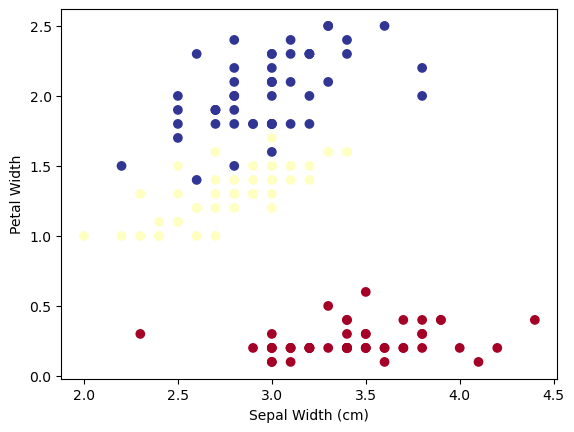

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdYlBu)
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Petal Width")

In [7]:
lr = LogisticRegression(random_state=0).fit(X, Y)

In [8]:
probability=lr.predict_proba(X)


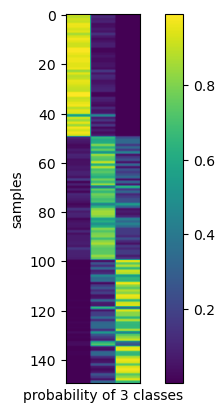

In [9]:
plot_probability_array(X,probability)

In [10]:
probability[0,:]

array([9.57671606e-01, 4.22321095e-02, 9.62845517e-05])

In [11]:
probability[0,:].sum()

1.0

In [12]:
np.argmax(probability[0,:])

0

In [13]:
softmax_prediction=np.argmax(probability,axis=1)
softmax_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [14]:
yhat =lr.predict(X)
accuracy_score(yhat,softmax_prediction)

1.0

In [15]:
from sklearn import svm
clf = svm.SVC(kernel='linear', gamma=0.5, probability=True)
clf.fit(X, Y)
yhat = clf.predict(X)

In [16]:
accuracy_score(Y, yhat)

0.96

{0, 1, 2}


C:\Users\M-TT\AppData\Local\Temp\ipykernel_15336\2166322594.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


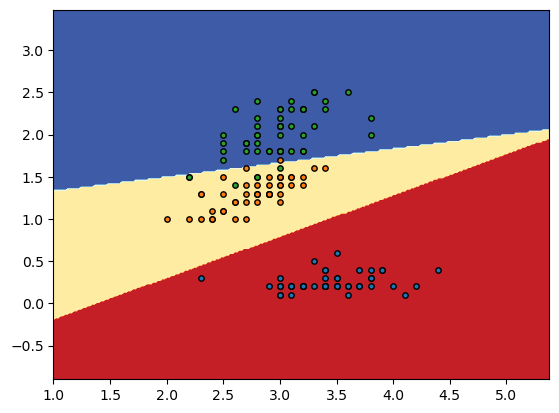

In [17]:
decision_boundary (X,Y,clf,iris)

In [19]:
model = svm.SVC(kernel='linear', gamma=0.5, probability=True)
model.fit(X, Y)
yhat2 = model.predict(X)

In [20]:
accuracy_score(Y, yhat2)

0.96

# One vs All

{0, 1, 2}


C:\Users\M-TT\AppData\Local\Temp\ipykernel_15336\2166322594.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


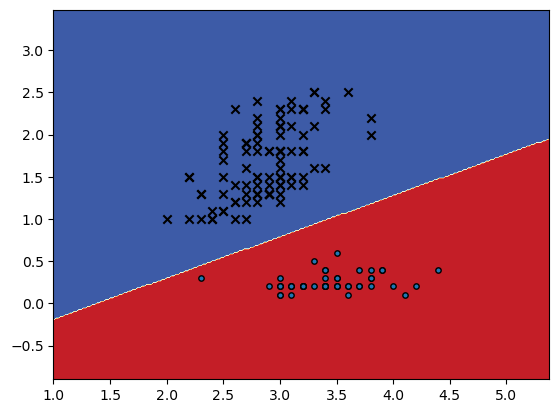

{0, 1, 2}


C:\Users\M-TT\AppData\Local\Temp\ipykernel_15336\2166322594.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


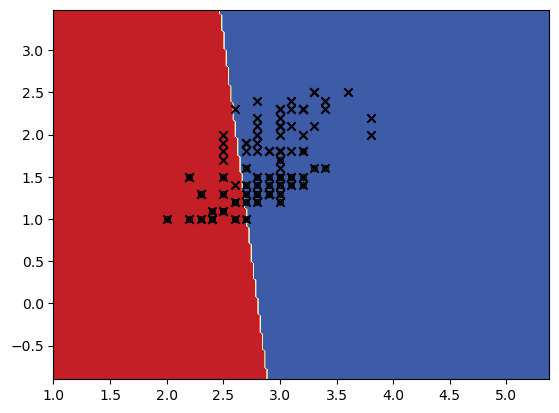

{0, 1, 2}


C:\Users\M-TT\AppData\Local\Temp\ipykernel_15336\2166322594.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


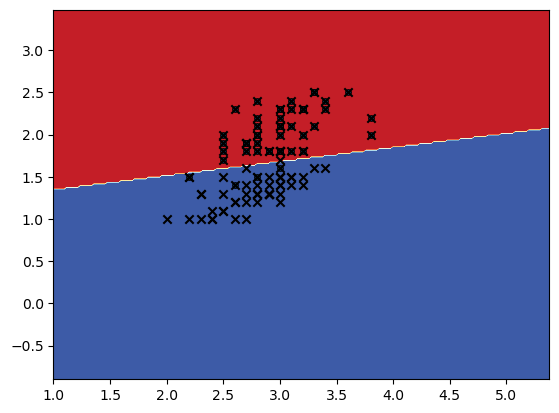

In [21]:
# dummy class
dummy_class = Y.max()+1
# List used for Classifiers
my_models =[]
#iterate through each class
for class_ in np.unique(Y):
    # select the index of our class
    select = (Y==class_)
    temp_Y = np.zeros(Y.shape)
    # class we are trying to classify
    temp_Y[Y!=class_] = dummy_class
    # Train model and add to list
    model = SVC(kernel='linear', gamma=.5, probability=True)
    my_models.append(model.fit(X, temp_Y))

    decision_boundary(X, temp_Y, model, iris)
    

In [22]:
probability_array = np.zeros((X.shape[0],3))
for j, model in enumerate(my_models):
    real_class = np.where(np.array(model.classes_)!=3)[0]
    probability_array[:,j]=model.predict_proba(X)[:,real_class][:,0]

In [23]:
probability_array[0,:]

array([9.90725589e-01, 1.21856825e-01, 5.31973420e-12])

In [24]:
probability_array[0,:].sum()

1.1125824132008773

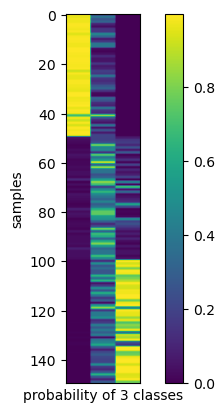

In [25]:
plot_probability_array(X,probability_array)

In [26]:
one_vs_all=np.argmax(probability_array,axis=1)
one_vs_all

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [28]:
accuracy_score(Y,one_vs_all)

0.9466666666666667

In [29]:
accuracy_score(one_vs_all,yhat)

0.9733333333333334

# One vs One

In [31]:
classes_=set(np.unique(Y))
classes_
   

{0, 1, 2}

In [32]:
K=len(classes_)
K*(K-1)/2

3.0

class 0 vs class 1 


C:\Users\M-TT\AppData\Local\Temp\ipykernel_15336\2166322594.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, s=15)


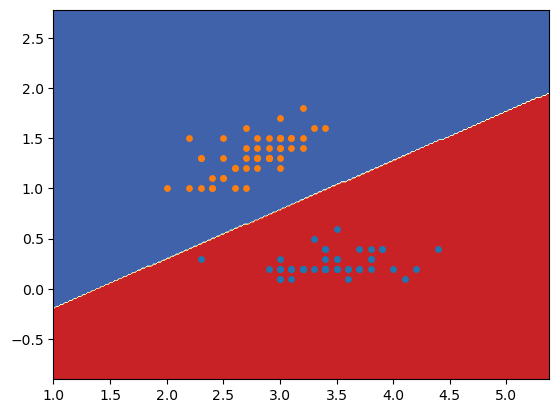

class 0 vs class 2 


C:\Users\M-TT\AppData\Local\Temp\ipykernel_15336\2166322594.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, s=15)


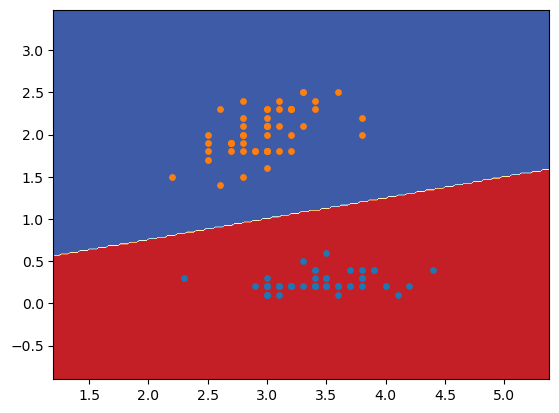

class 1 vs class 2 


C:\Users\M-TT\AppData\Local\Temp\ipykernel_15336\2166322594.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, s=15)


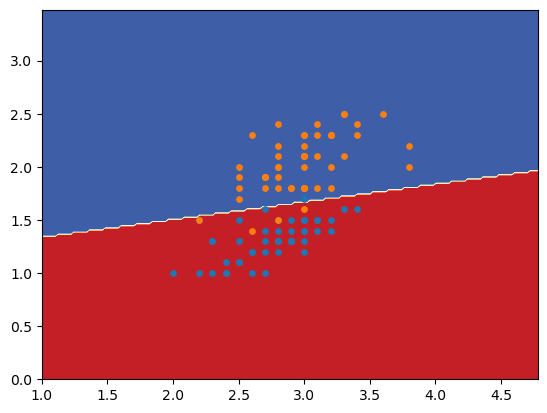

In [34]:
pairs=[]
left_overs=classes_.copy()
#list used for classifiers 
my_models=[]
#iterate through each class
for class_ in classes_:
    #remove class we have seen before 
    left_overs.remove(class_)
    #the second class in the pair
    for second_class in left_overs:
        pairs.append(str(class_)+' and '+str(second_class))
        print("class {} vs class {} ".format(class_,second_class) )
        temp_y=np.zeros(Y.shape)
        #find classes in pair 
        select=np.logical_or(Y==class_ , Y==second_class)
        #train model 
        model=SVC(kernel='linear', gamma=.5, probability=True)  
        model.fit(X[select,:],Y[select])
        my_models.append(model)
        #Plot decision boundary for each pair and corresponding Training samples. 
        decision_boundary (X[select,:],Y[select],model,iris,two=True)

In [35]:
pairs

['0 and 1', '0 and 2', '1 and 2']

In [36]:
pairs
majority_vote_array=np.zeros((X.shape[0],3))
majority_vote_dict={}
for j,(model,pair) in enumerate(zip(my_models,pairs)):

    majority_vote_dict[pair]=model.predict(X)
    majority_vote_array[:,j]=model.predict(X)

In [37]:
pd.DataFrame(majority_vote_dict).head(10)

,0 and 1,0 and 2,1 and 2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [39]:
one_vs_one=np.array([np.bincount(sample.astype(int)).argmax() for sample  in majority_vote_array]) 
one_vs_one

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [40]:
accuracy_score(Y,one_vs_one)

0.96

In [41]:
accuracy_score(yhat,one_vs_one)

1.0